# Preprocesamiento
## Recomendaciones/Requerimientos
* ### Muestra del 20% de los datos
* ### Considerar únicamente la lista corta de causas de muerte (lc1)
* ### Eliminar:
* * ### Defunciones ocurridas fuera de Ecuador
* * ### Muertes violentas
* * ### Muertes por COVID-19
* * ### Causas mal definidas
* * ### Resto de causas
* * ### Valores vacíos
* ### Crear una fecha de almacenamiento que considere año y mes (variable categórica)
* ### Seleccionar las variables del dataset

Antes de preprocesar el dataset como tal, se analizan los datos con un software externo y consultando el documento de la metodología del Registro
Estadístico de Defunciones Generales del INEC, para comprender la información con la que se está trabajando y comenzar a eliminar información innecesaria o inválida

Se comenzará por la lista de consideraciones y eliminaciones del archivo completo

In [42]:
%pip install pandas pyreadstat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# Bibliotecas
import pandas as pd
import numpy as np

Se carga y se muestra todo el archivo .sav

In [44]:
df = pd.read_spss('EDG_1990_2021.sav')
df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
0,Loja,Loja,Loja,1990.0,Julio,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,,,999,999,999,,,NaN
1,Loja,Loja,Loja,1990.0,Junio,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
2,Loja,Loja,Loja,1990.0,Septiembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
3,Azuay,Cuenca,Cuenca,1990.0,Agosto,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
4,Azuay,Cuenca,Cuenca,1990.0,Agosto,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,,,999,999,999,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982276,Manabí,Jama,Jama,2021.0,Diciembre,16.0,2021-12-16,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,Y87 Secuelas de lesiones autoinfligidas inte...,Y87 Secuelas de lesiones autoinfligidas inte...,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y872 Secuelas de eventos de intención no dete...,88 Resto de causas
1982277,Chimborazo,Alausí,Alausí,2021.0,Marzo,23.0,2021-03-23,Ecuatoriana,Ecuador,Hombre,...,Rural,Rural,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas
1982278,El Oro,El Guabo,El Guabo,2021.0,Noviembre,11.0,2021-11-11,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas
1982279,Loja,Espíndola,Amaluza,2021.0,Agosto,30.0,2021-08-30,Ecuatoriana,Ecuador,Mujer,...,Rural,Rural,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas


La primer consideración en la lista del principio es considerar solo la lista lc1, adicionalmente, considerar solo las muertes por causas naturales.
La lista lc1 se refiere a la **lista reducida de causas de muerte CIE-10**

Se comenzará eliminando todos los datos que no contengan información alguna en la columna lc1

In [45]:
#Se crea nuevo dataset para almacenar los preprocesamientos
df_1 = df.dropna(subset=['lc1'])
df_1

#df.dropna(subset=['lc1'])

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
363765,El Oro,Machala,Machala,1997.0,Enero,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,X95 Agresión con disparo de otras armas de f...,X95 Agresión con disparo de otras armas de f...,102 Agresiones,079 Agresiones,060 Causas externas de morbilidad y de mortalidad,066 Agresiones,X950 Agresión con disparo de otras armas de f...,64 Agresiones (Homicidios)
363766,El Oro,Machala,Machala,1997.0,Mayo,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C16 Tumor maligno del estómago,C16 Tumor maligno del estómago,029 Tumor maligno del estomago,027 Tumor maligno del estomago,016 Tumores [neoplasias],018 Resto de tumores malignos,"C169 Tumor maligno del estómago, parte no esp...",9 Neoplasia maligna del estómago
363767,El Oro,Arenillas,Arenillas,1997.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,X74 Lesión autoinfligida intencionalmente po...,X74 Lesión autoinfligida intencionalmente po...,101 Lesiones autoinfligidas intencionalmente,078 Lesiones autoinfligidas intencionalmente,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,X749 Lesión autoinfligida intencionalmente po...,63 Lesiones autoinflingidas intencionalmente (...
363768,El Oro,El Guabo,El Guabo,1997.0,Marzo,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,G03 Meningitis debida a otras causas y a las...,G03 Meningitis debida a otras causas y a las...,059 Meningitis,049 Meningitis,026 Enfermedades del sistema nervioso,027 Meningitis,"G039 Meningitis, no especificada",5 Meningitis
363769,El Oro,El Guabo,El Guabo,1997.0,Septiembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,G08 Flebitis y tromboflebitis intracraneal e...,G08 Flebitis y tromboflebitis intracraneal e...,061 Resto de enfermedades del sistema nervioso,072 Todas las demas enfermedades,026 Enfermedades del sistema nervioso,028 Resto de enfermedades del sistema nervioso,G08 Flebitis y tromboflebitis intracraneal e...,88 Resto de causas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982276,Manabí,Jama,Jama,2021.0,Diciembre,16.0,2021-12-16,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,Y87 Secuelas de lesiones autoinfligidas inte...,Y87 Secuelas de lesiones autoinfligidas inte...,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y872 Secuelas de eventos de intención no dete...,88 Resto de causas
1982277,Chimborazo,Alausí,Alausí,2021.0,Marzo,23.0,2021-03-23,Ecuatoriana,Ecuador,Hombre,...,Rural,Rural,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas
1982278,El Oro,El Guabo,El Guabo,2021.0,Noviembre,11.0,2021-11-11,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas
1982279,Loja,Espíndola,Amaluza,2021.0,Agosto,30.0,2021-08-30,Ecuatoriana,Ecuador,Mujer,...,Rural,Rural,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas


Las eliminaciones de muertes violentas, por COVID-19, por causas mal definidas y por el resto de causas pueden eliminarse al mismo tiempo

Sus valores lc1 son 64, 66 y 67 (COVID), 99 y 88 respectivamente

In [46]:
lc1_del = ['64 Agresiones (Homicidios)', 'COVID-19, virus identificado', 'COVID-19, virus no identificado', '99 Causas mal definidas', '88 Resto de causas'] #Lista de valores lc1 a eliminar
df_1 = df_1[~df_1['lc1'].isin(lc1_del)]
df_1

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
363766,El Oro,Machala,Machala,1997.0,Mayo,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C16 Tumor maligno del estómago,C16 Tumor maligno del estómago,029 Tumor maligno del estomago,027 Tumor maligno del estomago,016 Tumores [neoplasias],018 Resto de tumores malignos,"C169 Tumor maligno del estómago, parte no esp...",9 Neoplasia maligna del estómago
363767,El Oro,Arenillas,Arenillas,1997.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,X74 Lesión autoinfligida intencionalmente po...,X74 Lesión autoinfligida intencionalmente po...,101 Lesiones autoinfligidas intencionalmente,078 Lesiones autoinfligidas intencionalmente,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,X749 Lesión autoinfligida intencionalmente po...,63 Lesiones autoinflingidas intencionalmente (...
363768,El Oro,El Guabo,El Guabo,1997.0,Marzo,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,G03 Meningitis debida a otras causas y a las...,G03 Meningitis debida a otras causas y a las...,059 Meningitis,049 Meningitis,026 Enfermedades del sistema nervioso,027 Meningitis,"G039 Meningitis, no especificada",5 Meningitis
363770,El Oro,El Guabo,El Guabo,1997.0,Diciembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,"A16 Tuberculosis respiratoria, no confirmada...","A16 Tuberculosis respiratoria, no confirmada...",005 Tuberculosis respiratoria,004 tuberculosis respiratorias,001 Ciertas enfermedades infecciosas y parasit...,004 Tuberculosis,"A162 Tuberculosis de pulmón, sin mención de c...",2 Tuberculosis
363771,El Oro,Pasaje,Pasaje,1997.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,W69 Ahogamiento y sumersión mientras se está...,W69 Ahogamiento y sumersión mientras se está...,098 Ahogamiento y sumersión accidentales,075 Ahogamiento y sumersion accidentales,060 Causas externas de morbilidad y de mortalidad,062 Ahogamiento y sumersión accidentales,W698 Ahogamiento y sumersión mientras se está...,60 Ahogamiento y sumersión accidentales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982230,Guayas,Guayaquil,Rocafuerte,2021.0,Octubre,20.0,2021-10-20,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y344 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982231,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Abril,6.0,2021-04-06,Extranjero,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y349 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982232,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Mayo,18.0,2021-05-18,Sin información,Zonas sin especificar,Hombre,...,Rural,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y349 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982233,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Mayo,14.0,2021-05-14,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas ex

La columna **prov_fall** será útil para eliminar las filas de defunciones ocurridas fuera de Ecuador, se eliminarán las filas que tengan a prov_fall vacía entendiéndose como que fallecieron en territorio externo a cualquier provincia (Ecuador)

In [47]:
df_1 = df_1.dropna(subset=['prov_fall']) #Eliminación de valores nulos
df_1

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
363766,El Oro,Machala,Machala,1997.0,Mayo,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C16 Tumor maligno del estómago,C16 Tumor maligno del estómago,029 Tumor maligno del estomago,027 Tumor maligno del estomago,016 Tumores [neoplasias],018 Resto de tumores malignos,"C169 Tumor maligno del estómago, parte no esp...",9 Neoplasia maligna del estómago
363767,El Oro,Arenillas,Arenillas,1997.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,X74 Lesión autoinfligida intencionalmente po...,X74 Lesión autoinfligida intencionalmente po...,101 Lesiones autoinfligidas intencionalmente,078 Lesiones autoinfligidas intencionalmente,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,X749 Lesión autoinfligida intencionalmente po...,63 Lesiones autoinflingidas intencionalmente (...
363768,El Oro,El Guabo,El Guabo,1997.0,Marzo,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,G03 Meningitis debida a otras causas y a las...,G03 Meningitis debida a otras causas y a las...,059 Meningitis,049 Meningitis,026 Enfermedades del sistema nervioso,027 Meningitis,"G039 Meningitis, no especificada",5 Meningitis
363770,El Oro,El Guabo,El Guabo,1997.0,Diciembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,"A16 Tuberculosis respiratoria, no confirmada...","A16 Tuberculosis respiratoria, no confirmada...",005 Tuberculosis respiratoria,004 tuberculosis respiratorias,001 Ciertas enfermedades infecciosas y parasit...,004 Tuberculosis,"A162 Tuberculosis de pulmón, sin mención de c...",2 Tuberculosis
363771,El Oro,Pasaje,Pasaje,1997.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,W69 Ahogamiento y sumersión mientras se está...,W69 Ahogamiento y sumersión mientras se está...,098 Ahogamiento y sumersión accidentales,075 Ahogamiento y sumersion accidentales,060 Causas externas de morbilidad y de mortalidad,062 Ahogamiento y sumersión accidentales,W698 Ahogamiento y sumersión mientras se está...,60 Ahogamiento y sumersión accidentales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982230,Guayas,Guayaquil,Rocafuerte,2021.0,Octubre,20.0,2021-10-20,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y344 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982231,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Abril,6.0,2021-04-06,Extranjero,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y349 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982232,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Mayo,18.0,2021-05-18,Sin información,Zonas sin especificar,Hombre,...,Rural,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y349 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982233,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Mayo,14.0,2021-05-14,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas ex

Limpiamos el dataset de valores NaN

In [48]:
# Convertir todas las columnas categóricas a tipo categórico si no lo están
categorical_columns = df_1.select_dtypes(include=['category']).columns
df_1[categorical_columns] = df_1[categorical_columns].astype('category')

# Añadir la categoría 'Desconocido' a cada columna categórica si aún no está presente
for col in categorical_columns:
    if 'Desconocido' not in df_1[col].cat.categories:
        df_1[col] = df_1[col].cat.add_categories('Desconocido')

# Reemplazar todos los valores NaN en el DataFrame df_1 con la cadena 'Desconocido'
df_1_clean = df_1.fillna('Desconocido')
# Convertir todas las columnas a tipo de datos cadena
df_1_clean = df_1_clean.astype(str)




In [49]:
df_1_clean

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
363766,El Oro,Machala,Machala,1997.0,Mayo,Desconocido,Desconocido,Desconocido,,Hombre,...,Urbana,Urbano,C16 Tumor maligno del estómago,C16 Tumor maligno del estómago,029 Tumor maligno del estomago,027 Tumor maligno del estomago,016 Tumores [neoplasias],018 Resto de tumores malignos,"C169 Tumor maligno del estómago, parte no esp...",9 Neoplasia maligna del estómago
363767,El Oro,Arenillas,Arenillas,1997.0,Noviembre,Desconocido,Desconocido,Desconocido,,Hombre,...,Urbana,Urbano,X74 Lesión autoinfligida intencionalmente po...,X74 Lesión autoinfligida intencionalmente po...,101 Lesiones autoinfligidas intencionalmente,078 Lesiones autoinfligidas intencionalmente,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,X749 Lesión autoinfligida intencionalmente po...,63 Lesiones autoinflingidas intencionalmente (...
363768,El Oro,El Guabo,El Guabo,1997.0,Marzo,Desconocido,Desconocido,Desconocido,,Mujer,...,Urbana,Urbano,G03 Meningitis debida a otras causas y a las...,G03 Meningitis debida a otras causas y a las...,059 Meningitis,049 Meningitis,026 Enfermedades del sistema nervioso,027 Meningitis,"G039 Meningitis, no especificada",5 Meningitis
363770,El Oro,El Guabo,El Guabo,1997.0,Diciembre,Desconocido,Desconocido,Desconocido,,Hombre,...,Urbana,Urbano,"A16 Tuberculosis respiratoria, no confirmada...","A16 Tuberculosis respiratoria, no confirmada...",005 Tuberculosis respiratoria,004 tuberculosis respiratorias,001 Ciertas enfermedades infecciosas y parasit...,004 Tuberculosis,"A162 Tuberculosis de pulmón, sin mención de c...",2 Tuberculosis
363771,El Oro,Pasaje,Pasaje,1997.0,Noviembre,Desconocido,Desconocido,Desconocido,,Hombre,...,Urbana,Urbano,W69 Ahogamiento y sumersión mientras se está...,W69 Ahogamiento y sumersión mientras se está...,098 Ahogamiento y sumersión accidentales,075 Ahogamiento y sumersion accidentales,060 Causas externas de morbilidad y de mortalidad,062 Ahogamiento y sumersión accidentales,W698 Ahogamiento y sumersión mientras se está...,60 Ahogamiento y sumersión accidentales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982230,Guayas,Guayaquil,Rocafuerte,2021.0,Octubre,20.0,2021-10-20,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y344 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982231,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Abril,6.0,2021-04-06,Extranjero,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y349 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982232,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Mayo,18.0,2021-05-18,Sin información,Zonas sin especificar,Hombre,...,Rural,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no especificado, de intención no ...",103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,"Y349 Evento no especificado, de intención no ...",65 Eventos de intención no determinada
1982233,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2021.0,Mayo,14.0,2021-05-14,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,"Y34 Evento no especificado, de intención no ...","Y34 Evento no 

Generamos el DF Final a utilizar en este caso 

In [50]:
# Seleccionar las columnas especificadas
columns_to_keep = ['sexo', 'anio_fall', 'mes_fall', 'edad', 'prov_fall', 'area_fall']
df_selected = df_1_clean[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_Final = df_selected.sample(frac=0.2, random_state=4)

# Mostrar las dimensiones del nuevo DataFrame
print("Dimensiones del nuevo DataFrame:", df_Final.shape)

# Convierte la columna "columna_float" a int
df_Final['anio_fall'] = df_Final['anio_fall'].apply(float)
df_Final['anio_fall'] = df_Final['anio_fall'].apply(int)
df_Final['anio_fall'] = df_Final['anio_fall'].apply(str)

df_Final['edad'] = df_Final['edad'].apply(float)
df_Final['edad'] = df_Final['edad'].apply(int)
df_Final['edad'] = df_Final['edad'].apply(str)

#df.anio_fall = float(df.anio_fall)
df_Final



Dimensiones del nuevo DataFrame: (251022, 6)


,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall
793619,Mujer,2004,Noviembre,74,Pichincha,Rural
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana
474680,Hombre,1999,Marzo,3,Guayas,Urbana
944418,Hombre,2007,Abril,47,Guayas,Urbana
...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana
1711899,Hombre,2019,Mayo,89,Guayas,Urbana


Este dataframe es mucho más manejable para entornos locales y para ahorrar tiempo con el archivo completo en Colab

# Algoritmos del codo

Para comenzar el clustering, se debe definir los nodos para agrupar todos los datos, la primera apoximación se va a realizar con la técnica gráfica del codo para obtener K

In [51]:
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_Final)
  cost_red.append(kmode_red.cost_)

In [53]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


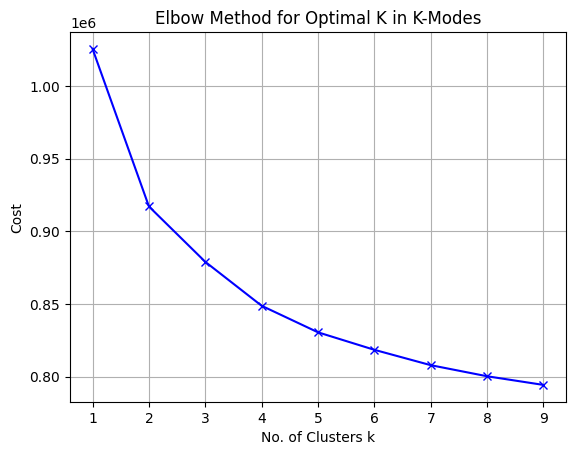

In [54]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Hay posibles codos en K = 2 y K = 4

Mediante Average Silhouette Score podemos saber cuál K es mejor

Primero, se construirá el modelo con 2 clusters

In [55]:
n_clusters = 2
km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, n_jobs=-1, verbose=1)
clusters_2 = km.fit_predict(df_Final)
clusters_2

Best run was number 3


array([0, 1, 1, ..., 0, 1, 1], dtype=uint16)

In [56]:
# Insertemos las etiquetas en nuestro dataset.
df_FCluster2 = df_Final.copy()
df_FCluster2.insert(6,"cluster_labels", clusters_2)
df_FCluster2

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,0
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,1
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,1
474680,Hombre,1999,Marzo,3,Guayas,Urbana,1
944418,Hombre,2007,Abril,47,Guayas,Urbana,1
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,1
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,1
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,0
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,1


In [57]:
%pip install gower


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Se necesita sacar una muestra del dataframe preprocesado, de lo contrario la memoria RAM será insuficiente hasta para entornos de ejecución locales

In [58]:
import gower
from sklearn.metrics import silhouette_score

#Muestra
df_str = df_FCluster2.sample(n=5000, random_state=1)

In [59]:
# Calcular la matriz de distancias de Gower
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 2: 0.1634609


Average Categorical Silhouette Score con K = 2: 0.23816729

Con K = 3

In [60]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, n_jobs=-1,verbose=1)
clusters_3 = km.fit_predict(df_Final)
clusters_3

Best run was number 3


array([0, 1, 2, ..., 0, 1, 1], dtype=uint16)

In [61]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster3 = df_Final.copy()
df_FCluster3.insert(6,"cluster_labels", clusters_3)
df_FCluster3

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,0
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,1
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,2
474680,Hombre,1999,Marzo,3,Guayas,Urbana,1
944418,Hombre,2007,Abril,47,Guayas,Urbana,1
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,1
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,1
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,0
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,1


In [62]:
#Muestra de nuevo
df_str = df_FCluster3.sample(n=5000, random_state=1)

In [63]:
import gower
from sklearn.metrics import silhouette_score

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower) 

Average Categorical Silhouette Score con K = 3: 0.09740308


Con K = 4

In [64]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, n_jobs=-1, verbose=1, random_state=5)
clusters_4 = km.fit_predict(df_Final)
clusters_4

Best run was number 1


array([0, 2, 0, ..., 1, 0, 0], dtype=uint16)

In [65]:
# Insertemos las etiquetas en nuestro dataset.
df_FCluster4 = df_Final.copy()
df_FCluster4.insert(6,"cluster_labels", clusters_4)
df_FCluster4

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,0
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,2
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,0
474680,Hombre,1999,Marzo,3,Guayas,Urbana,1
944418,Hombre,2007,Abril,47,Guayas,Urbana,1
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,2
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,2
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,1
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,0


In [66]:
import gower
from sklearn.metrics import silhouette_score

#Muestra
df_str = df_FCluster4.sample(n=5000, random_state=1)

In [67]:
# Calcular la matriz de distancias de Gower
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 4: 0.043114647


Average Categorical Silhouette Score con K = 4: 0.13152339

El cluster con K = 4 parece la mejor opción.

## Visualización de los clusters

Antes de visualizar nada, hay que convertir los valores no categóricos del dataframe a valores dummy

In [68]:
df_categorical = pd.get_dummies(df_Final)
df_categorical

,sexo_Hombre,sexo_Mujer,anio_fall_1997,anio_fall_1998,anio_fall_1999,anio_fall_2000,anio_fall_2001,anio_fall_2002,anio_fall_2003,anio_fall_2004,...,prov_fall_Orellana,prov_fall_Pastaza,prov_fall_Pichincha,prov_fall_Santa Elena,prov_fall_Santo Domingo de los Tsachilas,prov_fall_Sucumbíos,prov_fall_Tungurahua,prov_fall_Zamora Chinchipe,area_fall_Rural,area_fall_Urbana
793619,False,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
366899,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
689408,True,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
474680,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
944418,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681168,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1138052,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1647239,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1711899,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [69]:
# Reducción de la dimensionalidad
# Instalamaos MCA
%pip install prince

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
# Importamos la libraría Prince que contiene MCA
import prince
# Indicamos el número de componentes que requerimos, que en este caso es cuatro.
mca = prince.MCA(n_components = 4)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical)
mca
# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical)
mca_coordinates

,0,1,2,3
793619,0.254763,0.086314,-0.054424,-0.058537
366899,-0.004522,-0.117444,0.033723,0.016286
689408,-0.030227,-0.091677,-0.215091,-0.027723
474680,-0.098487,-0.085041,0.017149,-0.060473
944418,-0.105339,-0.095583,0.124765,0.021377
...,...,...,...,...
1681168,-0.058409,-0.088945,-0.068744,0.105774
1138052,-0.055260,-0.106775,-0.053831,0.070035
1647239,-0.064678,0.129904,0.032546,0.010166
1711899,-0.074438,-0.062913,0.092550,-0.005776


In [71]:
# Agregamos una columna con la etiqueta de los clusters. K = 4
mca_coordinates['cluster_labels'] = df_FCluster4['cluster_labels']
mca_coordinates

,0,1,2,3,cluster_labels
793619,0.254763,0.086314,-0.054424,-0.058537,0
366899,-0.004522,-0.117444,0.033723,0.016286,2
689408,-0.030227,-0.091677,-0.215091,-0.027723,0
474680,-0.098487,-0.085041,0.017149,-0.060473,1
944418,-0.105339,-0.095583,0.124765,0.021377,1
...,...,...,...,...,...
1681168,-0.058409,-0.088945,-0.068744,0.105774,2
1138052,-0.055260,-0.106775,-0.053831,0.070035,2
1647239,-0.064678,0.129904,0.032546,0.010166,1
1711899,-0.074438,-0.062913,0.092550,-0.005776,0


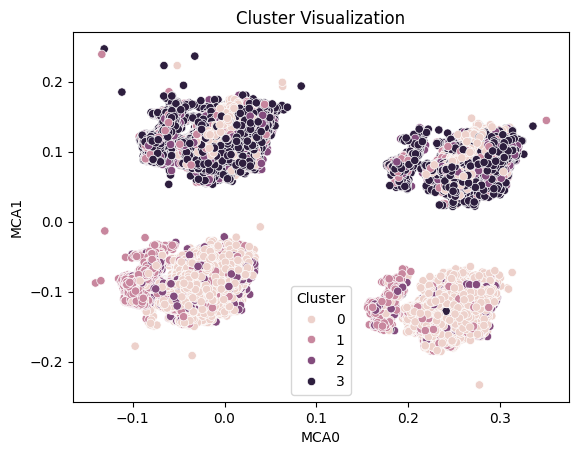

In [72]:
# Dibujamos los clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.loc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------

# Observaciones clase 06 de mayo
## Los comentarios y sugerencias de los profesores sobre la entrega actual dejan varias tareas para la ocasión:
* ### Cambiar random_state para que concuerde con el número del equipo
* ### Modificar, optimizar y probar hiperparámetros según lo mostrado en la misma clase
* ### Seleccionar variables
* * #### Para este caso se probará primero con los dataframes obtenidos para los clusters: df_FCluster2 y df_FCluster3

En primer lugar, random_state se cambió a 4 en una de las celdas de inicio para que la aleatoriedad de la muestra sea el número del equipo

Se volverá a calcular Average Categorical Silhouette Score para los dataframes con 2 y 3 clusters, modificando y añadiendo hiperparámeros hasta llegar a un mínimo de 0.2, o lo más cercano a este

Siguiendo la recomendación del profesor Henry, no se modificarán los hiperparámetros de max_iter y cat_dissim

Para reducir el tiempo de cada prueba, KModes usará todos los procesadores disponibles con el hiperparámetro n_jobs=-1

Se aumentará únicamente n_init a 20

### Para K = 2

In [73]:
n_clusters_tst = 2
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1 ,verbose=1)
clusters_2_tst = km_tst.fit_predict(df_Final)
clusters_2_tst

Best run was number 17


array([0, 1, 1, ..., 0, 1, 1], dtype=uint16)

In [74]:
# Insertemos las etiquetas en nuestro dataset.
df_FCluster2_tst = df_Final.copy()
df_FCluster2_tst.insert(6,"cluster_labels", clusters_2_tst)
df_FCluster2_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,0
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,1
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,1
474680,Hombre,1999,Marzo,3,Guayas,Urbana,1
944418,Hombre,2007,Abril,47,Guayas,Urbana,1
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,1
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,1
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,0
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,1


In [75]:
#Muestra
df_str_tst = df_FCluster2_tst.sample(n=5000, random_state=1)

In [76]:
# Calcular la matriz de distancias de Gower
gower_distances_tst = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances_tst, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower_tst)

Average Categorical Silhouette Score con K = 2: 0.1639157


El ACSS bajó ligeramente, se intentará añadir un valor aleatorio de inicialización

In [77]:
n_clusters_tst = 2
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1, verbose=1, random_state=1)
clusters_2_tst = km_tst.fit_predict(df_Final)
clusters_2_tst

Best run was number 15


array([1, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [78]:
# Insertemos las etiquetas en nuestro dataset.
df_FCluster2_tst = df_Final.copy()
df_FCluster2_tst.insert(6,"cluster_labels", clusters_2_tst)
df_FCluster2_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,1
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,0
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,0
474680,Hombre,1999,Marzo,3,Guayas,Urbana,0
944418,Hombre,2007,Abril,47,Guayas,Urbana,0
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,0
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,0
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,1
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,0


Adicionalmente, se cambió el random_state de la muestra del dataframe, únicamente para probar si esto cambiaba en algo el ACSS

In [79]:
#Muestra
df_str_tst = df_FCluster2_tst.sample(n=5000, random_state=4)

In [80]:
# Calcular la matriz de distancias de Gower
gower_distances_tst = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances_tst, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower_tst)

Average Categorical Silhouette Score con K = 2: 0.19594346


ACSS aumentó ligeramente, se intenta con otro número para el random_state

In [81]:
n_clusters_tst = 2
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1, verbose=1, random_state=2)
clusters_2_tst = km_tst.fit_predict(df_Final)
clusters_2_tst

Best run was number 6


array([1, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [82]:
# Insertemos las etiquetas en nuestro dataset.
df_FCluster2_tst = df_Final.copy()
df_FCluster2_tst.insert(6,"cluster_labels", clusters_2_tst)
df_FCluster2_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,1
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,0
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,0
474680,Hombre,1999,Marzo,3,Guayas,Urbana,0
944418,Hombre,2007,Abril,47,Guayas,Urbana,0
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,0
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,0
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,1
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,0


In [83]:
#Muestra
df_str_tst = df_FCluster2_tst.sample(n=5000, random_state=4)

In [84]:
# Calcular la matriz de distancias de Gower
gower_distances = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower_tst)

Average Categorical Silhouette Score con K = 2: 0.15749139


Viendo la tendencia a aumentar el ACSS conforme aumenta random_state, se prueba con 5

In [85]:
n_clusters_tst = 2
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1, verbose=1, random_state=5)
clusters_2_tst = km_tst.fit_predict(df_Final)
clusters_2_tst

Best run was number 8


array([1, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [86]:
# Insertemos las etiquetas en nuestro dataset.
df_FCluster2_tst = df_Final.copy()
df_FCluster2_tst.insert(6,"cluster_labels", clusters_2_tst)
df_FCluster2_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,1
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,0
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,0
474680,Hombre,1999,Marzo,3,Guayas,Urbana,0
944418,Hombre,2007,Abril,47,Guayas,Urbana,0
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,0
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,0
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,1
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,0


In [87]:
#Muestra
df_str_tst = df_FCluster2_tst.sample(n=5000, random_state=4)

In [88]:
# Calcular la matriz de distancias de Gower
gower_distances = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower_tst)

Average Categorical Silhouette Score con K = 2: 0.15749139


random_state=6

In [89]:
n_clusters_tst = 2
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1, verbose=1, random_state=6)
clusters_2_tst = km_tst.fit_predict(df_Final)
clusters_2_tst

Best run was number 11


array([1, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [90]:
# Insertemos las etiquetas en nuestro dataset.
df_FCluster2_tst = df_Final.copy()
df_FCluster2_tst.insert(6,"cluster_labels", clusters_2_tst)
df_FCluster2_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,1
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,0
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,0
474680,Hombre,1999,Marzo,3,Guayas,Urbana,0
944418,Hombre,2007,Abril,47,Guayas,Urbana,0
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,0
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,0
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,1
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,0


In [91]:
#Muestra
df_str_tst = df_FCluster2_tst.sample(n=5000, random_state=4)

In [92]:
# Calcular la matriz de distancias de Gower
gower_distances = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower_tst)

Average Categorical Silhouette Score con K = 2: 0.15380965


ACSS bajó, se conserva random_state=5

### Para K = 3
Se intenta con random_state=5, 4 y 6 para comprobar si los resultados son como K = 2

In [93]:
n_clusters_tst = 3
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1, random_state=5 , verbose=1)
clusters_3_tst = km_tst.fit_predict(df_Final)
clusters_3_tst

Best run was number 9


array([0, 1, 2, ..., 0, 1, 2], dtype=uint16)

In [94]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster3_tst = df_Final.copy()
df_FCluster3_tst.insert(6,"cluster_labels", clusters_3_tst)
df_FCluster3_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,0
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,1
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,2
474680,Hombre,1999,Marzo,3,Guayas,Urbana,1
944418,Hombre,2007,Abril,47,Guayas,Urbana,1
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,1
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,1
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,0
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,1


In [95]:
#Muestra de nuevo
df_str_tst = df_FCluster3_tst.sample(n=5000, random_state=4)

In [96]:
# Luego calcular la matriz de distancias de Gower como antes
gower_distances_tst = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances_tst, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower_tst) 

Average Categorical Silhouette Score con K = 3: 0.09866628


random_state=4

In [97]:
n_clusters_tst = 3
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1, random_state=4 , verbose=1)
clusters_3_tst = km_tst.fit_predict(df_Final)
clusters_3_tst

Best run was number 2


array([0, 1, 1, ..., 0, 0, 1], dtype=uint16)

In [98]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster3_tst = df_Final.copy()
df_FCluster3_tst.insert(6,"cluster_labels", clusters_3_tst)
df_FCluster3_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,0
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,1
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,1
474680,Hombre,1999,Marzo,3,Guayas,Urbana,2
944418,Hombre,2007,Abril,47,Guayas,Urbana,2
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,0
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,1
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,0
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,0


In [99]:
#Muestra de nuevo
df_str_tst = df_FCluster3_tst.sample(n=5000, random_state=4)

In [100]:
# Luego calcular la matriz de distancias de Gower como antes
gower_distances_tst = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances_tst, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower_tst) 

Average Categorical Silhouette Score con K = 3: 0.074046865


random_state=6

In [101]:
n_clusters_tst = 3
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1, random_state=6 , verbose=1)
clusters_3_tst = km_tst.fit_predict(df_Final)
clusters_3_tst

Best run was number 17


array([0, 0, 0, ..., 1, 2, 0], dtype=uint16)

In [102]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster3_tst = df_Final.copy()
df_FCluster3_tst.insert(6,"cluster_labels", clusters_3_tst)
df_FCluster3_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,0
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,0
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,0
474680,Hombre,1999,Marzo,3,Guayas,Urbana,2
944418,Hombre,2007,Abril,47,Guayas,Urbana,2
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,0
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,0
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,1
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,2


In [103]:
#Muestra de nuevo
df_str_tst = df_FCluster3_tst.sample(n=5000, random_state=4)

In [104]:
# Luego calcular la matriz de distancias de Gower como antes
gower_distances_tst = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances_tst, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower_tst) 

Average Categorical Silhouette Score con K = 3: 0.060930785


El ACSS sigue muy bajo para ser considerado sobre K = 2

In [105]:
n_clusters_tst = 3
km_tst = KModes(n_clusters=n_clusters_tst, init='Huang', n_init=20, n_jobs=-1, verbose=1, random_state=5)
clusters_3_tst = km_tst.fit_predict(df_Final)
clusters_3_tst

Best run was number 9


array([0, 1, 2, ..., 0, 1, 2], dtype=uint16)

In [106]:
# Insertemos las etiquetas en nuestro dataset.
df_FCluster3_tst = df_Final.copy()
df_FCluster3_tst.insert(6,"cluster_labels", clusters_3_tst)
df_FCluster3_tst

,sexo,anio_fall,mes_fall,edad,prov_fall,area_fall,cluster_labels
793619,Mujer,2004,Noviembre,74,Pichincha,Rural,0
366899,Hombre,1997,Septiembre,25,Bolívar,Urbana,1
689408,Hombre,2002,Noviembre,16,Pichincha,Urbana,2
474680,Hombre,1999,Marzo,3,Guayas,Urbana,1
944418,Hombre,2007,Abril,47,Guayas,Urbana,1
...,...,...,...,...,...,...,...
1681168,Hombre,2018,Diciembre,76,Santo Domingo de los Tsachilas,Urbana,1
1138052,Hombre,2010,Diciembre,39,Manabí,Urbana,1
1647239,Mujer,2018,Diciembre,84,Guayas,Urbana,0
1711899,Hombre,2019,Mayo,89,Guayas,Urbana,1


In [107]:
#Muestra
df_str_tst = df_FCluster3_tst.sample(n=5000, random_state=4)

In [108]:
# Calcular la matriz de distancias de Gower
gower_distances = gower.gower_matrix(df_str_tst.drop('cluster_labels', axis=1))
# Calcular el Silhouette Score
silhouette_avg_gower_tst = silhouette_score(gower_distances, df_str_tst['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower_tst)

Average Categorical Silhouette Score con K = 3: 0.09866628
